In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Carrega o dataset
irisData = pd.read_csv("dados/iris_data.csv")

In [3]:
# Visualiza as primeiras linhas
print(irisData.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [4]:
# Resumo estatístico
print(irisData.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [5]:
# Correlação
print(irisData.corr())

             SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000   -0.109369     0.871754    0.817954
SepalWidth     -0.109369    1.000000    -0.420516   -0.356544
PetalLength     0.871754   -0.420516     1.000000    0.962757
PetalWidth      0.817954   -0.356544     0.962757    1.000000


In [6]:
# Atributos e Variável target
features = irisData[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
targetVariables = irisData.Class

In [7]:
# Gera os dados de treino
featureTrain, featureTest, targetTrain, targetTest = train_test_split(features, 
                                                                      targetVariables, 
                                                                      test_size = .2)

In [8]:
# Criação do modelo
clf = DecisionTreeClassifier()

In [9]:
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [10]:
modelo = clf.fit(featureTrain, targetTrain)
previsoes = modelo.predict(featureTest)

In [11]:
print (confusion_matrix(targetTest, previsoes))

[[ 9  0  0]
 [ 0  9  1]
 [ 0  1 10]]


In [12]:
# Obs: Dependendo da versão do Scikit-Learn, a acurácia pode ser diferente
print (accuracy_score(targetTest, previsoes))

0.9333333333333333


## Random Forest Classifier - I

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
%matplotlib inline

In [14]:
# Gera o dataset
digitos = load_digits()

In [15]:
# Aplica Escala nos dados
data = scale(digitos.data)

In [16]:
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [17]:
data.shape

(1797, 64)

In [18]:
# Obtém número de observações e número de atributos
n_observ, n_features = data.shape

In [19]:
n_observ

1797

In [20]:
n_features

64

In [21]:
# Obtém os labels
n_digits = len(np.unique(digitos.target))
labels = digitos.target

In [22]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [23]:
# Cria o classificador
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
clf = RandomForestClassifier(n_estimators  = 10)

Os 4 principais parâmetros em Modelos de Random Forest são:

n_estimators - quanto maior, melhor!

max depth - o padrão é 'none' e nesse caso árvores completas são criadas. Ajustando esse parâmetro pode ajudar a evitar overfitting.

max_features - diferentes valores devem ser testados, pois este parâmetro impacta na forma como os modelos RF distribuem os atributos pelas árvores.

criterion - define a forma como o algoritmo fará a divisão dos atributos e a classificação dos nós em cada árvore.

In [24]:
# Construção do modelo
clf = clf.fit(data, labels)

In [25]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
# Estamos apenas "simulando" os dados de teste
scores = clf.score(data,labels)

In [27]:
print(scores)

1.0


In [32]:
# Extraindo a importância
importances = clf.feature_importances_
indices = np.argsort(importances)

In [29]:
# Obtém os índices
ind=[]
for i in indices:
    ind.append(labels[i])

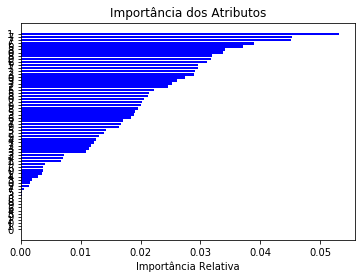

In [30]:
# Plot da Importância dos Atributos
plt.figure(1)
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)),ind)
plt.xlabel('Importância Relativa')
plt.show()

## Random Forest Classifier - II

In [ ]:
!pip install treeinterpreter

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_iris

In [ ]:
# Carrega o dataset
iris = load_iris()

In [ ]:
# Cria o classificador
rf = RandomForestClassifier(max_depth = 4)

In [ ]:
# Obtém os índices a partir do comprimento da variável target
idx = list(range(len(iris.target)))

In [ ]:
# Randomiza o ínidce
np.random.shuffle(idx)

In [ ]:
# Cria o modelo
rf.fit(iris.data[idx][:100], iris.target[idx][:100])

In [ ]:
?rf.predict_proba

In [ ]:
# Obtém as instâncias (exemplos ou observações) e retorna as probabilidades
# Obs: Como estamos trabalhando com randomização os resultados na sua máquina podem ser ligeiramente diferentes!
instance = iris.data[idx][100:101]
print(rf.predict_proba(instance))

In [ ]:
prediction, bias, contributions = ti.predict(rf, instance)
print ("Previsões", prediction)
print ("Contribuição dos Atributos:")
for item, feature in zip(contributions[0], iris.feature_names):
    print (feature, item)

## Random Forest Regressor

### Random Forest Classifier - composto por árvores de decisão de classificação
### Random Forest Regressor - composto por árvores de decisão de regressão

http://www.boardgamegeek.com/

Nosso dataset possui registros de 81.312 Games Boards como esse: http://www.boardgamegeek.com/boardgame/167791/terraforming-mars

### Colunas no dataset:

https://github.com/ThaWeatherman/scrapers/tree/master/boardgamegeek

name – name of the board game.

playingtime – the playing time (given by the manufacturer).

minplaytime – the minimum playing time (given by the manufacturer).

maxplaytime – the maximum playing time (given by the manufacturer).

minage – the minimum recommended age to play.

users_rated – the number of users who rated the game.

average_rating – the average rating given to the game by users. (0-10)

total_weights – Number of weights given by users.  Weight is a subjective measure that is made up by BoardGameGeek. 

It’s how “deep” or involved a game is. Here’s a full explanation.

average_weight – the average of all the subjective weights (0-5).

In [ ]:
# Import 
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# Carregando o dataset
games = pandas.read_csv("dados/games_data.csv")

In [ ]:
# Imprimindo o nome das colunas
print(games.columns)

In [ ]:
print(games.shape)

In [ ]:
# Histograma com a média de avaliações
plt.hist(games["average_rating"])
plt.show()

In [ ]:
# Visualizando as observações com rating igual a 0
games[games["average_rating"] == 0]

In [ ]:
# Retornando a primeira linha do subset do dataframe, onde o índice é igual a 0.
print(games[games["average_rating"] == 0].iloc[0])

In [ ]:
# Retornando a primeira linha do subset do dataframe, onde o índice é maior que 0.
print(games[games["average_rating"] > 0].iloc[0])

In [ ]:
# Removendo as linhas sem avaliação de usuários.
games = games[games["users_rated"] > 0]

In [ ]:
# Removendo linhas com valores missing
games = games.dropna(axis = 0)

In [ ]:
# Histograma com a média de avaliações
plt.hist(games["average_rating"])
plt.show()

In [ ]:
# Correlação
games.corr()["average_rating"]

In [ ]:
# Obtém todas as colunas do dataframe
colunas = games.columns.tolist()

In [ ]:
# Filtra as colunas e remove as que não são relevantes
colunas = [c for c in colunas if c not in ["bayes_average_rating", "average_rating", "type", "name"]]

In [ ]:
# Preparando a variável target, a que será prevista
target = "average_rating"

In [ ]:
# Gerando os dados de treino
df_treino = games.sample(frac = 0.8, random_state = 101)

In [ ]:
# Seleciona tudo que não está no dataset de treino e armazena no dataset de teste
df_teste = games.loc[~games.index.isin(df_treino.index)]

In [ ]:
# Shape dos datasets
print(df_treino.shape)
print(df_teste.shape)

In [ ]:
# Criando um Regressor
reg_v1 = LinearRegression()

In [ ]:
# Fit the model to the training data.
modelo_v1 = reg_v1.fit(df_treino[colunas], df_treino[target])

In [ ]:
modelo_v1

In [ ]:
# Fazendo previsões
previsoes = modelo_v1.predict(df_teste[colunas])

In [ ]:
# Computando os erros entre valores observados e valores previstos
mean_squared_error(previsoes, df_teste[target])

In [ ]:
# Criando um regressor Random Forest
reg_v2 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 101)

In [ ]:
# Criando o modelo
modelo_v2 = reg_v2.fit(df_treino[colunas], df_treino[target])

In [ ]:
# Fazendo previsões
previsoes = modelo_v2.predict(df_teste[colunas])

In [ ]:
# Computando o erro
mean_squared_error(previsoes, df_teste[target])

### Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>